In [1]:
import pandas as pd
import os
import requests
from acquire import get_items, new_stores, get_stores, get_sales, combined_data, combine_store_data, get_germany_power
from prepare import prep_combine, prep_opsd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
df = combined_data()
df = prep_combine(df)

In [3]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [4]:
df = df.groupby(['sale_date']).sales_total.sum().reset_index()
df

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85
...,...,...
1821,2017-12-27 00:00:00+00:00,109151.15
1822,2017-12-28 00:00:00+00:00,117377.49
1823,2017-12-29 00:00:00+00:00,126541.84
1824,2017-12-30 00:00:00+00:00,134903.07


In [5]:
#df.to_csv('prepared_combo.csv')

In [6]:
#df = pd.read_csv('prepared_combo.csv')

In [8]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

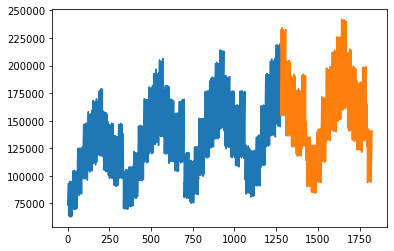

In [9]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [11]:
train = train.set_index('sale_date')

In [48]:
y=train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

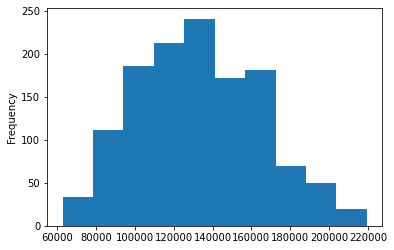

In [13]:
y.plot.hist(bins=10)

[Text(0.5, 1.0, 'Average Sales Total by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'sales_total')]

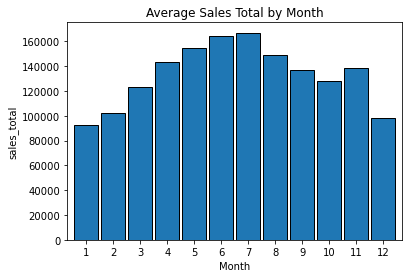

In [14]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='sales_total')

In [15]:
#let's see sales total by month
train['month'] = train.index.month

<AxesSubplot:xlabel='month'>

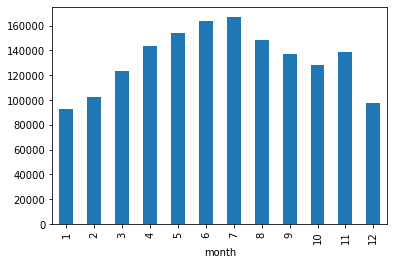

In [16]:
train.groupby('month').sales_total.mean().plot.bar()

In [17]:
#let's see sales total by weekday
train['weekday']=train.index.day_name()

<AxesSubplot:xlabel='weekday'>

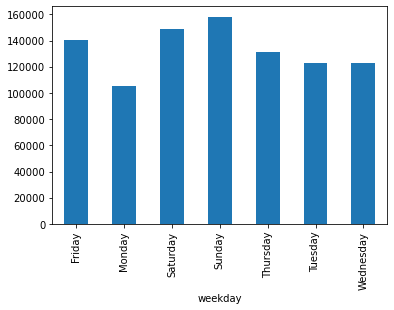

In [21]:
train.groupby('weekday').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

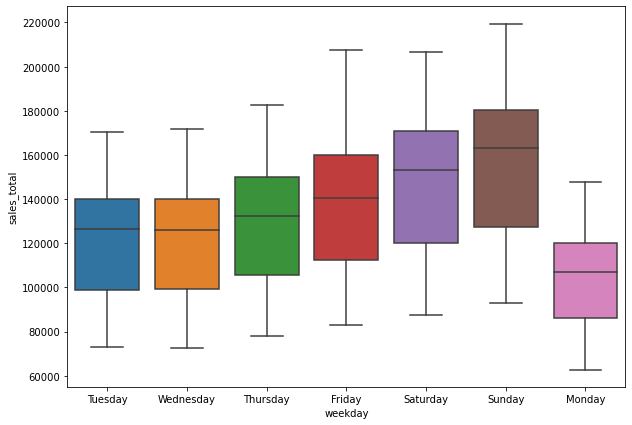

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='weekday',y='sales_total')

In [24]:
plt.rc('figure', figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.rc('font',size=16)

<AxesSubplot:xlabel='sale_date'>

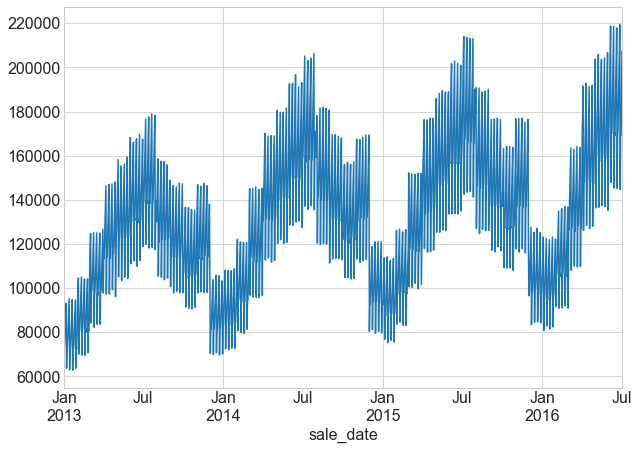

In [25]:
y.plot()

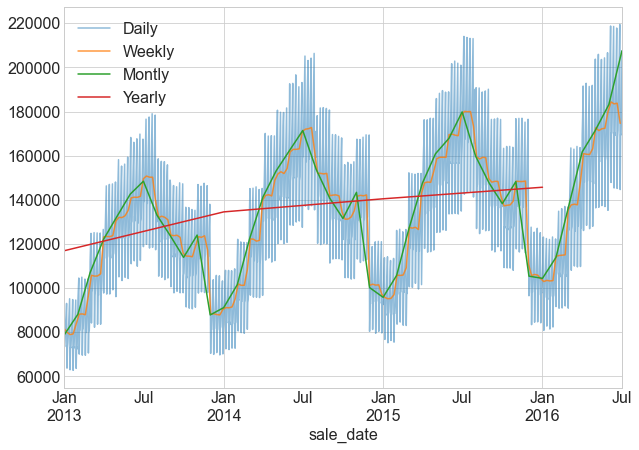

In [49]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

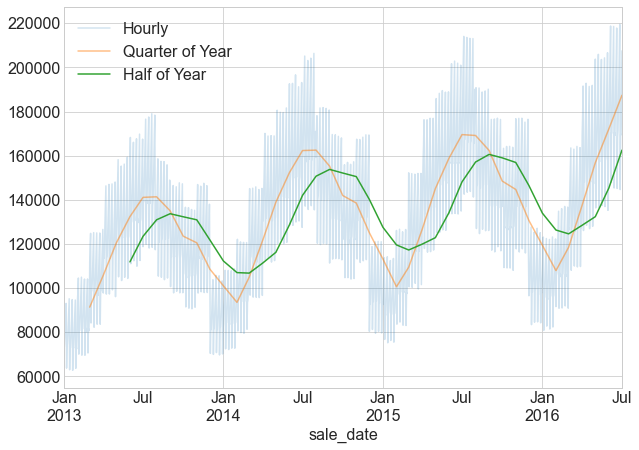

In [27]:
y.plot(alpha=.2, label='Hourly')
y.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='Quarter of Year')
y.resample('M').mean().rolling(6).mean().plot(alpha=8, label='Half of Year')
plt.legend()

<AxesSubplot:title={'center':'Average Month Change in Total Sales'}, xlabel='sale_date'>

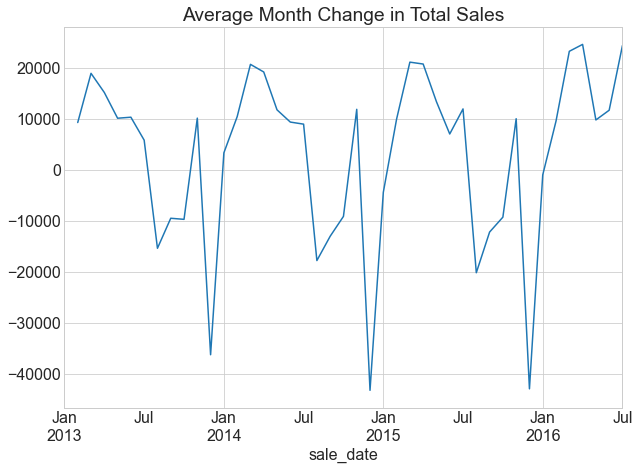

In [28]:
y.resample('M').mean().diff().plot(title='Average Month Change in Total Sales')

<AxesSubplot:title={'center':'Average Weekly Change in Total Sales'}, xlabel='sale_date'>

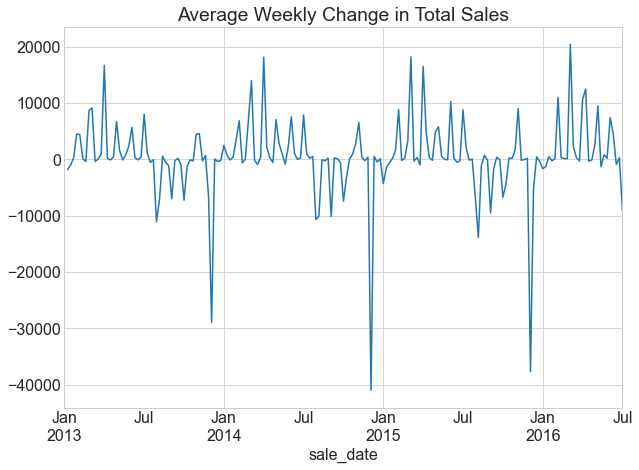

In [29]:
y.resample('W').mean().diff().plot(title='Average Weekly Change in Total Sales')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

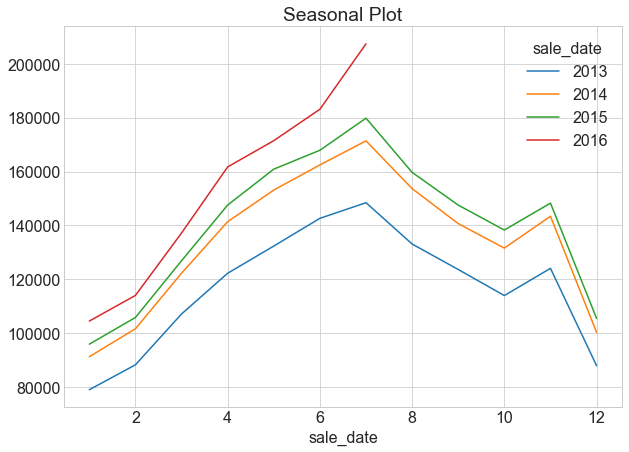

In [30]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

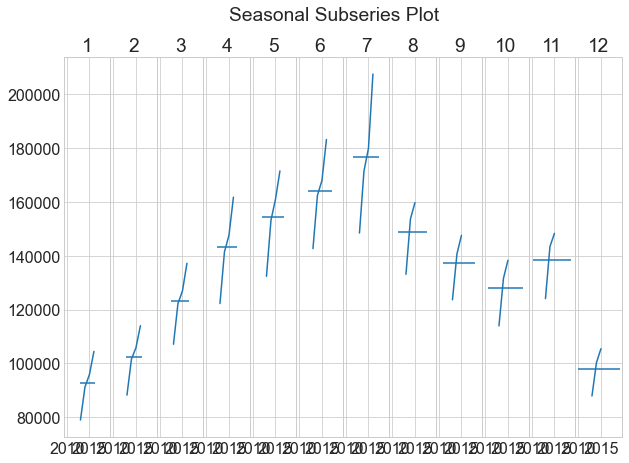

In [31]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

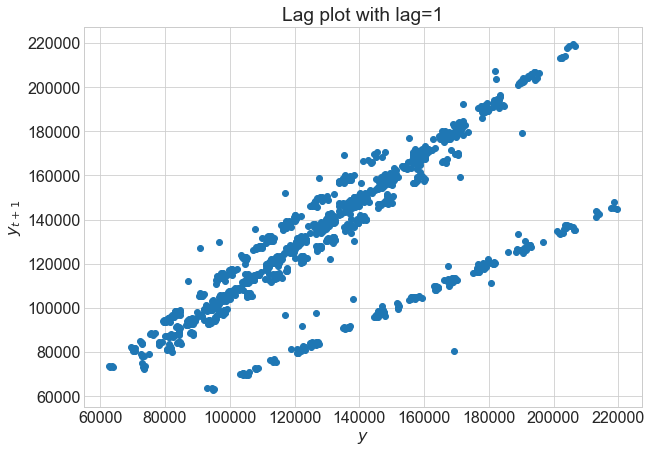

In [32]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

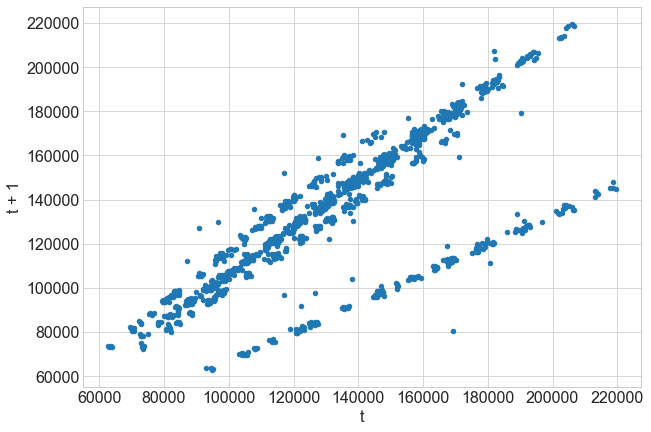

In [33]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

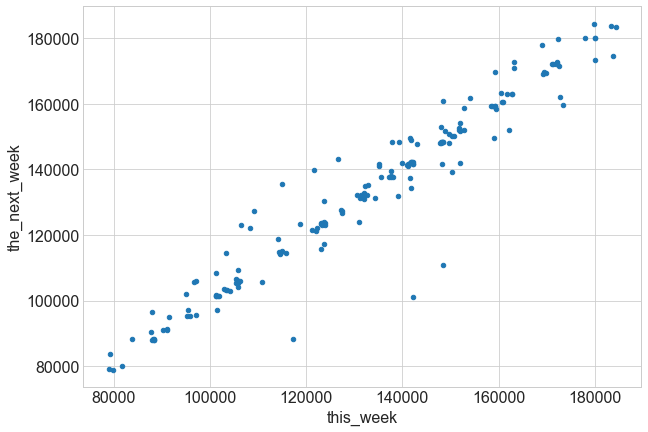

In [34]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')

<AxesSubplot:xlabel='this_week', ylabel='half_a_year_later'>

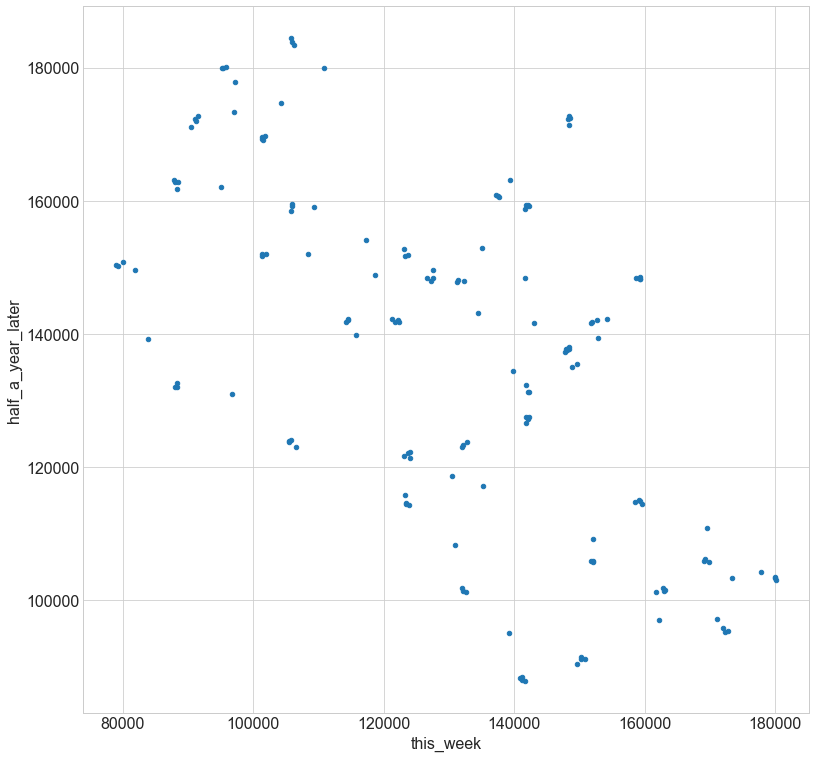

In [35]:
#let's look 6 months later
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

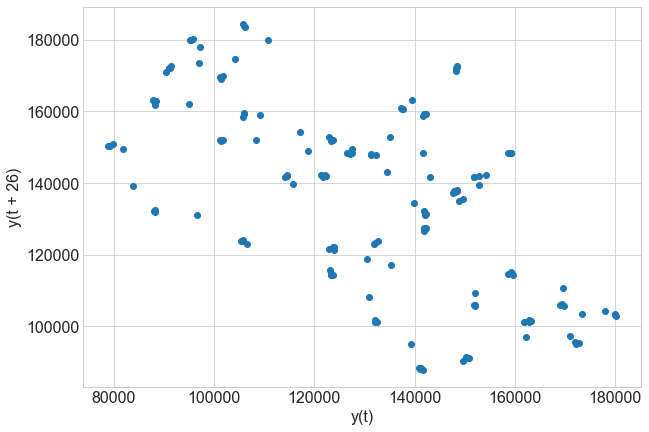

In [36]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

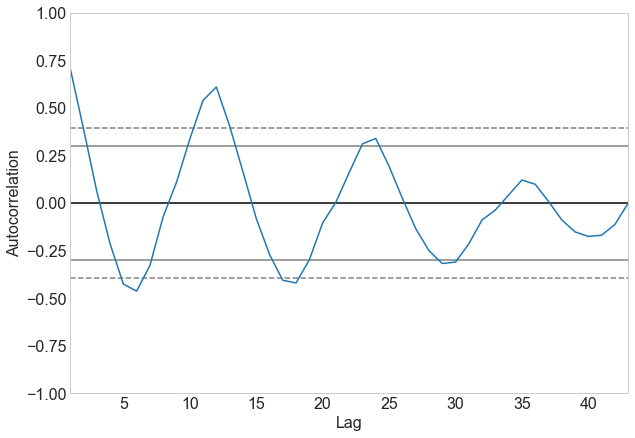

In [37]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('M').mean())

In [38]:
y = train.sales_total.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-31 00:00:00+00:00,78947.361290,NaN,-39639.550997,NaN
2013-02-28 00:00:00+00:00,88205.927500,NaN,-29250.221824,NaN
2013-03-31 00:00:00+00:00,107090.825161,NaN,-9445.523172,NaN
2013-04-30 00:00:00+00:00,122230.041000,NaN,9475.026870,NaN
2013-05-31 00:00:00+00:00,132331.561290,NaN,20999.628955,NaN


<AxesSubplot:xlabel='sale_date'>

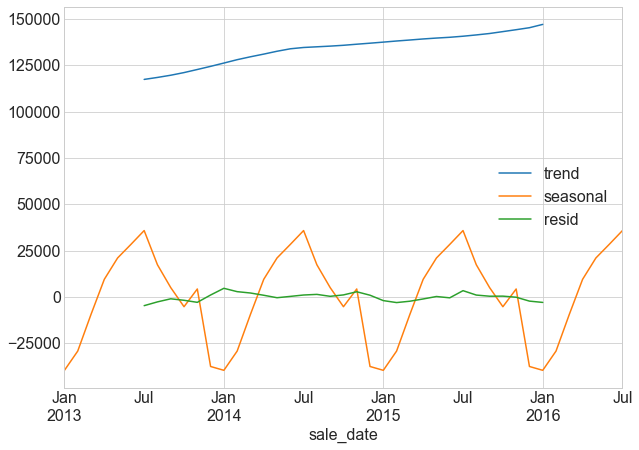

In [39]:
decomposition.iloc[:, 1:].plot()

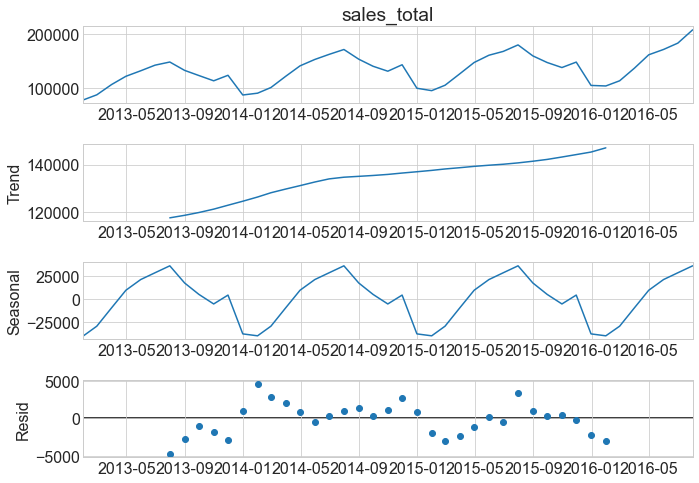

In [40]:
result.plot()
None

In [41]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['low','medium','high'])
train.groupby('sales_bin').mean()

,sales_total,month,y(t + 1)
sales_bin,,,
low,97828.398052,5.117371,103999.461150
medium,131801.070376,6.615023,134940.205915
high,168858.169554,6.553991,159749.627294


Text(0, 0.5, '% of days in the month')

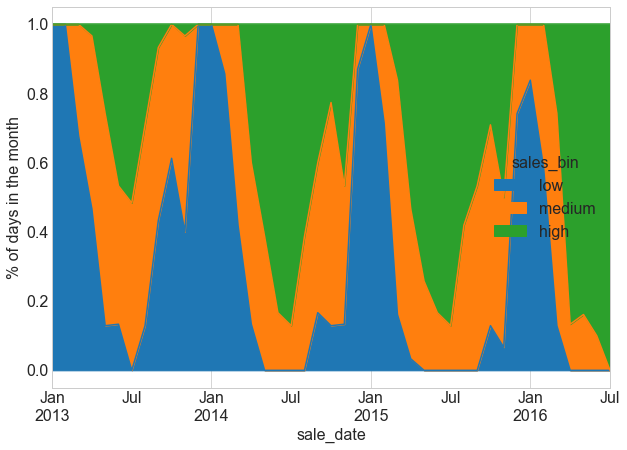

In [42]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

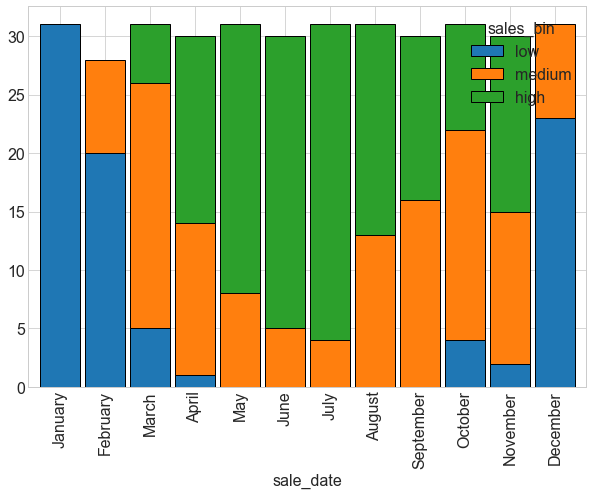

In [43]:
ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

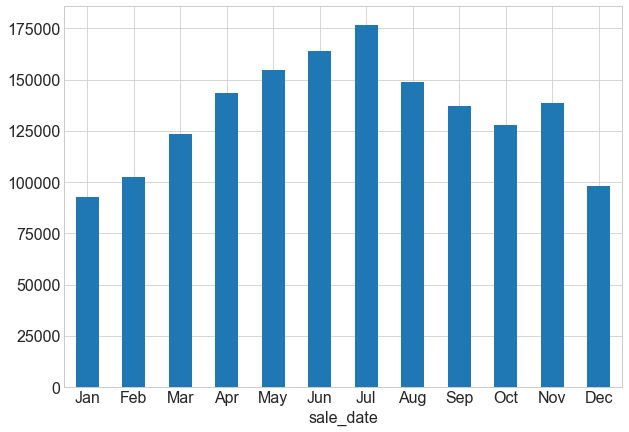

In [44]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

# OPSD

In [109]:
gf = get_germany_power()

In [110]:
gf = prep_opsd(gf)

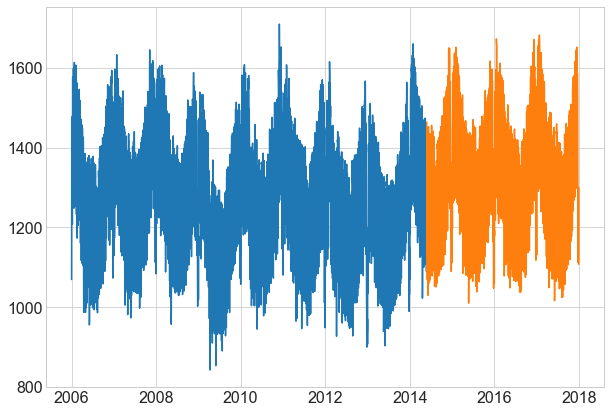

In [111]:
train_size = .70
n = gf.shape[0]
test_start_index = round(train_size * n)

train = gf[:test_start_index] # everything up (not including) to the test_start_index
test = gf[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [112]:
gf.columns=['consumption','wind','solar','wind+solar','month','year']
train.columns=['consumption','wind','solar','wind+solar','month','year']
test.columns=['consumption','wind','solar','wind+solar','month','year']

In [113]:
y=train.consumption

<AxesSubplot:ylabel='Frequency'>

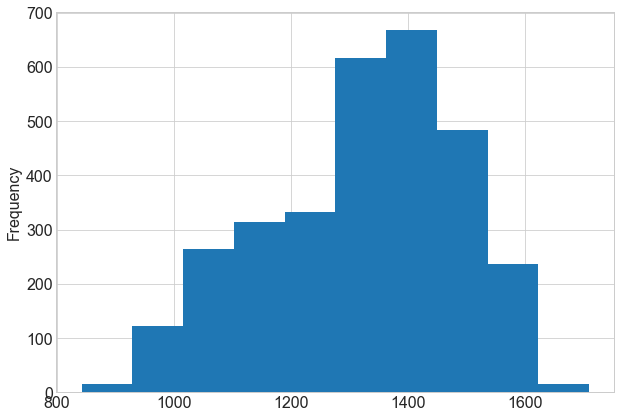

In [114]:
train.consumption.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Week'),
 Text(0.5, 0, 'week'),
 Text(0, 0.5, 'consumption')]

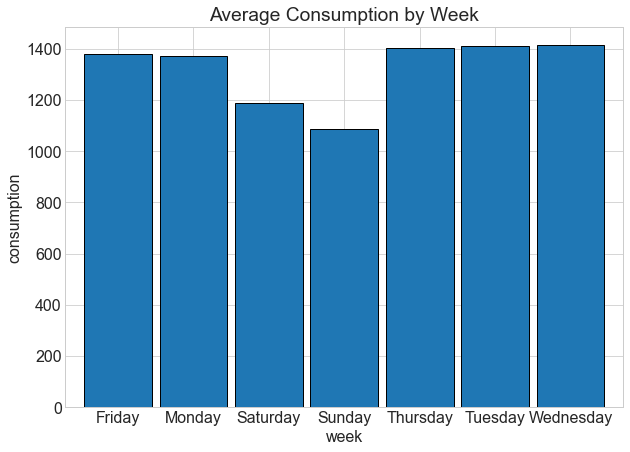

In [115]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Week', xlabel='week', ylabel='consumption')

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'consumption')]

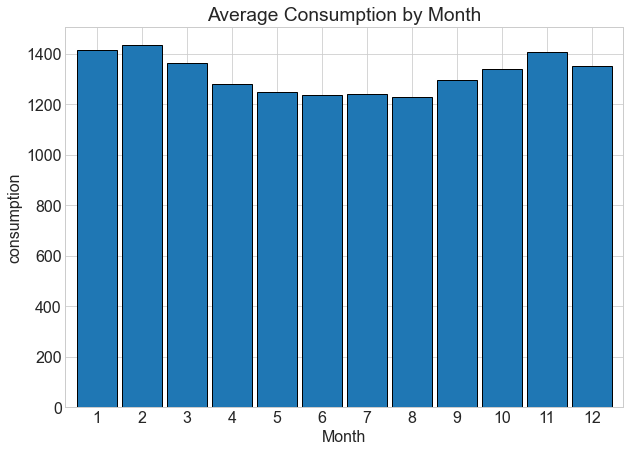

In [116]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='consumption')

[Text(0.5, 1.0, 'Average Consumption by Year'),
 Text(0.5, 0, 'year'),
 Text(0, 0.5, 'consumption')]

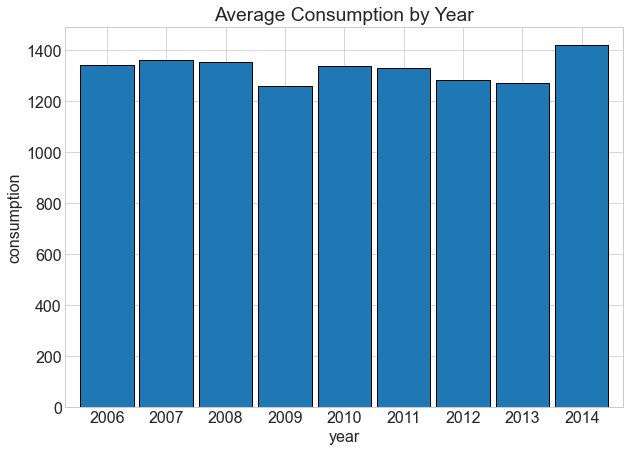

In [117]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Year', xlabel='year', ylabel='consumption')

<AxesSubplot:xlabel='month', ylabel='consumption'>

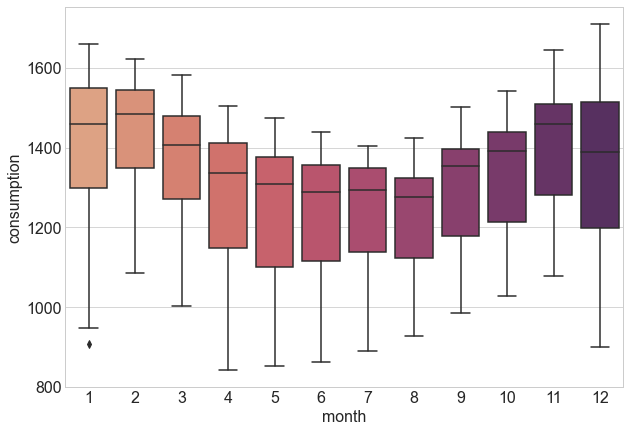

In [118]:
sns.boxplot(data=train, x='month',y='consumption', palette='flare')

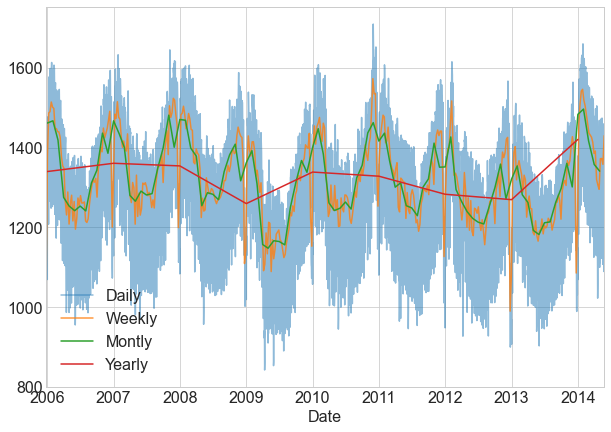

In [119]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average Month Change in Energy Consumption'}, xlabel='Date'>

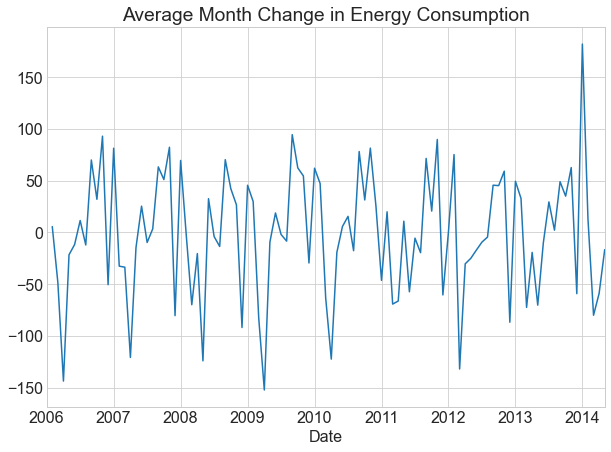

In [120]:
y.resample('M').mean().diff().plot(title='Average Month Change in Energy Consumption')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

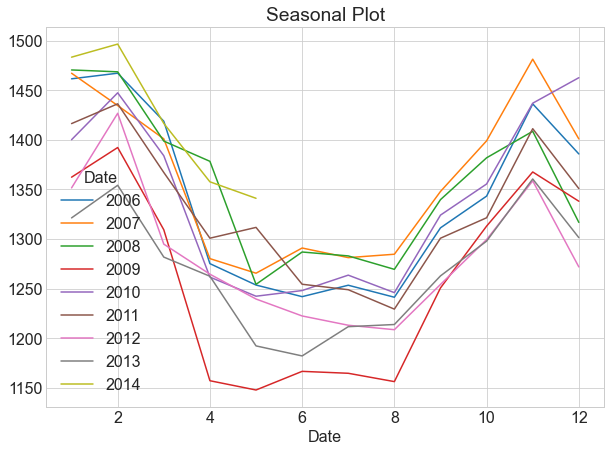

In [121]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

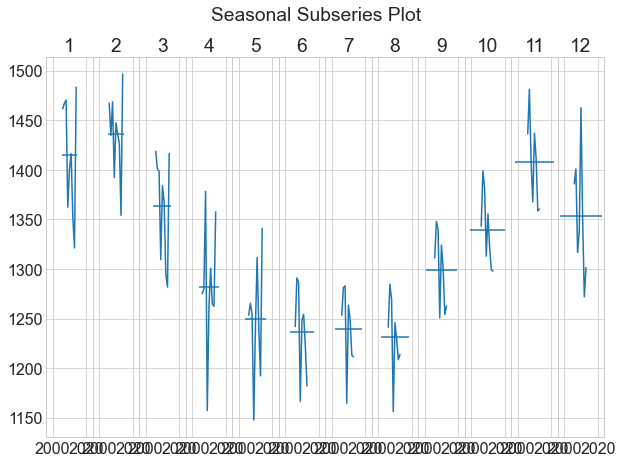

In [122]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

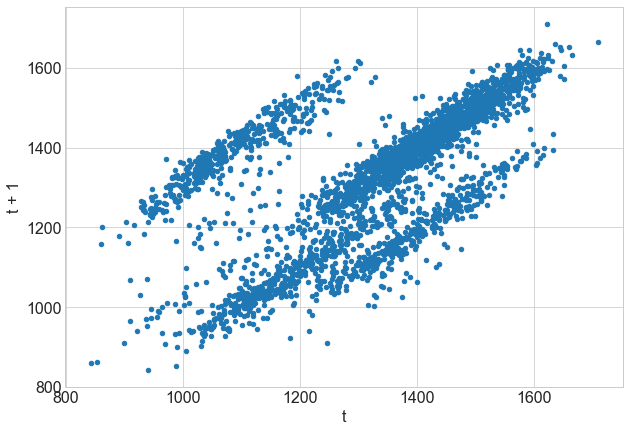

In [123]:
train['y(t + 1)'] = train.consumption.shift(-1)
ax = train.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

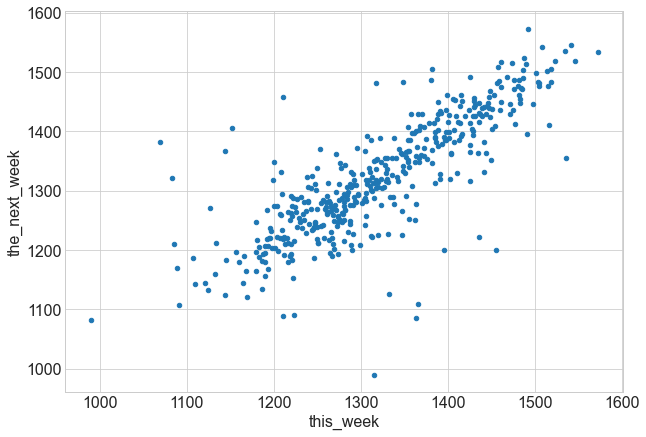

In [124]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

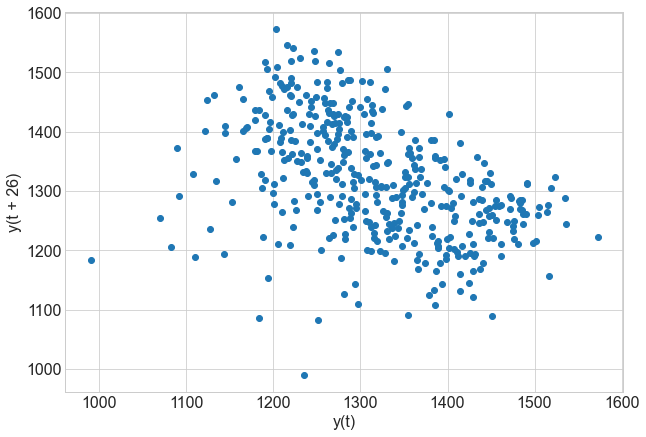

In [125]:
#look into half a year later
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

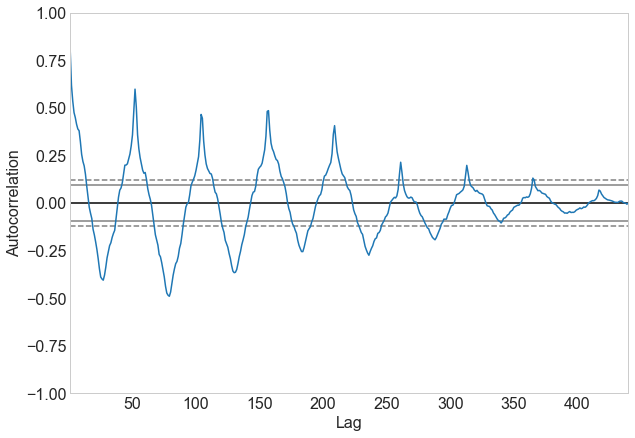

In [126]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())

In [127]:
y = train.consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,82.131826,NaN
2006-02-28,1467.106893,NaN,106.938411,NaN
2006-03-31,1418.649161,NaN,32.625533,NaN
2006-04-30,1275.058900,NaN,-42.766287,NaN
2006-05-31,1253.488484,NaN,-78.014809,NaN


<AxesSubplot:xlabel='Date'>

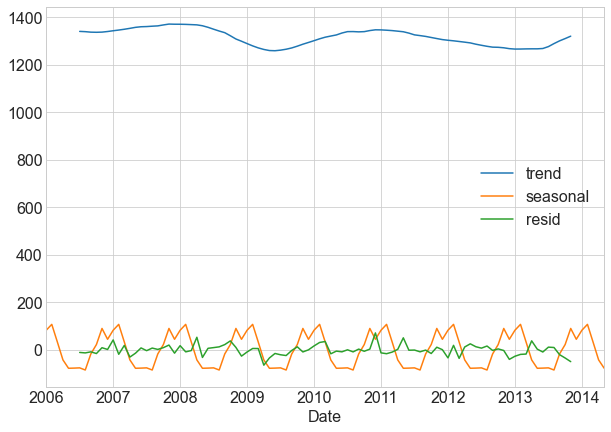

In [128]:
decomposition.iloc[:, 1:].plot()

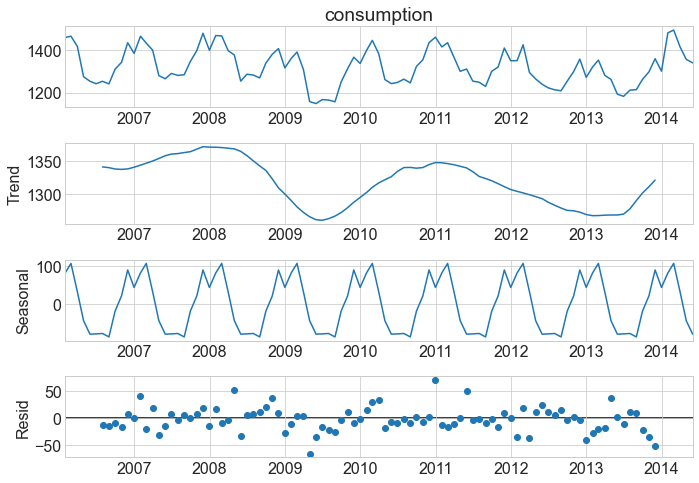

In [129]:
result.plot()
None

In [137]:
train = train.resample('D').mean()
# create a categorical feature
train['consumption_bin'] = pd.qcut(train.consumption, 3, labels=['low','medium','high'])
train.groupby('consumption_bin').mean()

,consumption,wind,solar,wind+solar,month,year,y(t + 1)
consumption_bin,,,,,,,
low,1125.874587,65.577156,26.331001,69.319043,6.617791,2009.879765,1216.841586
medium,1345.901834,59.831141,29.165084,65.998640,6.452055,2009.715264,1294.959949
high,1493.085339,66.784214,13.010112,46.922207,5.988270,2009.548387,1453.385992
